In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("preprocessed_dataset.csv")

In [3]:
dataset.head()

,disrict,client_catg,region,region_group,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,...,months_number_max_mean,counter_type_range,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,delta_index_range,delta_index_max_mean,target
0,0.000000,0.0,0.000000,0.0,0.582524,0.028571,0.073394,0.040251,0.0,0.142857,...,0.017515,0.0,0.0,1.000000,0.227106,1.000000,0.721412,0.001192,0.788090,0
1,1.000000,0.0,0.020134,0.0,0.409709,0.054054,0.077982,0.040251,0.0,0.142857,...,0.009348,0.0,0.0,0.818182,0.270677,1.000000,0.657374,0.000899,0.788028,0
2,0.222222,0.0,0.671141,1.0,0.786408,0.055556,0.034404,0.040251,0.0,0.142857,...,0.009481,0.0,0.0,0.818182,0.189676,1.000000,0.739702,0.002560,0.788085,0
3,1.000000,0.0,0.013423,0.0,0.537864,0.050000,0.038991,0.040251,0.0,0.142857,...,0.004713,0.0,0.0,0.818182,0.229086,0.500000,0.312570,0.000012,0.788415,0
4,0.222222,0.0,0.677852,1.0,0.120388,0.285714,0.025229,0.040251,0.0,0.142857,...,0.000846,0.0,0.0,0.909091,0.167116,0.285714,0.196191,0.001997,0.788043,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123557 entries, 0 to 123556
Columns: 105 entries, disrict to target
dtypes: float64(104), int64(1)
memory usage: 99.0 MB


In [5]:
features = dataset.drop('target', axis = 1)

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123557 entries, 0 to 123556
Columns: 104 entries, disrict to delta_index_max_mean
dtypes: float64(104)
memory usage: 98.0 MB


In [8]:
from sklearn import ensemble

In [11]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(features)

IsolationForest(n_jobs=-1, random_state=42)

In [12]:
pred = clf.predict(features)
features['anomaly']=pred
outliers=features.loc[features['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(features['anomaly'].value_counts())

 1    117340
-1      6217
Name: anomaly, dtype: int64


In [10]:
features.columns

Index(['disrict', 'client_catg', 'region', 'region_group', 'coop_time',
       'is_weekday_mean', 'transactions_count', 'tarif_type_mean',
       'tarif_type_std', 'tarif_type_min',
       ...
       'months_number_range', 'months_number_max_mean', 'counter_type_range',
       'counter_type_max_mean', 'invoice_month_range',
       'invoice_month_max_mean', 'invoice_year_range', 'invoice_year_max_mean',
       'delta_index_range', 'delta_index_max_mean'],
      dtype='object', length=104)

In [16]:
outlier_label = []
outlier_label = list(pred)

In [17]:
print(outlier_label.count(-1))

6217


In [18]:
c = 0
end = 123557
for i in range(0,end):
    if dataset['target'][i] == 'anomaly' and outlier_label[i] == -1:
        c += 1
    
print(c)

0


In [19]:
q = 0
while q < len(outlier_label):
    if outlier_label[q] == -1:
        #print(q)
        dataset.drop(q,axis=0,inplace =True)
    q+=1

Text(0, 0.5, 'tarif_type_mean')

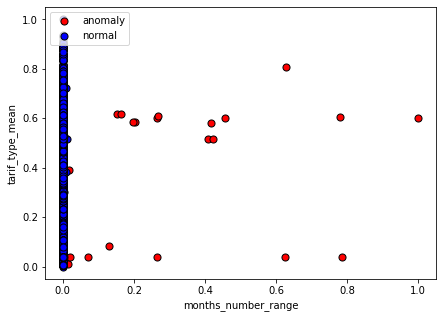

In [36]:
outlier_label = np.array(outlier_label)
#print(outlier_label)
outlier_label = outlier_label.reshape(1,end)
plt.figure(figsize=(7,5))
plt.scatter(features[outlier_label[0] == -1].months_number_range,
            features[outlier_label[0] == -1].tarif_type_mean,
            s=50,
            c='red',
            marker='o',
            edgecolors= 'black',
           label = 'anomaly')

plt.scatter(features[outlier_label[0] == 1].months_number_range,
            features[outlier_label[0] == 1].tarif_type_mean,
            s=50,
            c='blue',
            marker='o',
            edgecolors= 'black',
            label='normal')

plt.legend(loc = 'upper left')
plt.xlabel('months_number_range')
plt.ylabel('tarif_type_mean')

## Extra

In [37]:
# from sklearn.decomposition import PCA
# pca = PCA(2)
# pca.fit(features)


# res=pd.DataFrame(pca.transform(features))

# Z = np.array(res)
# figsize=(12, 7)
# plt.figure(figsize=figsize)
# plt.title("IsolationForest")
# plt.contourf( Z, cmap=plt.cm.Blues_r)

# b1 = plt.scatter(res[0], res[1], c='blue',
#                  s=20,label="normal points")

# b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
#                  s=20,  edgecolor="red",label="predicted outliers")
# plt.legend(loc="upper right")
# plt.show()

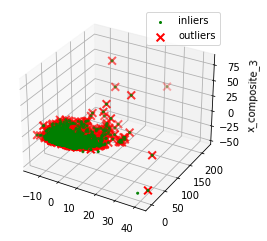

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(features)
X_reduce = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117340 entries, 0 to 123556
Columns: 105 entries, disrict to target
dtypes: float64(104), int64(1)
memory usage: 94.9 MB


In [48]:
dataset.to_csv('after_outlier_dataset.csv')

https://www.kaggle.com/adithya44/anomaly-detection-isolation-forest-visualization